In [1]:
import pandas as pd 
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df = df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)

In [3]:
df.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [4]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
dtype: int64

In [5]:
import math
mean_age = math.floor(df['Age'].mean())

In [6]:
mean_age

29

In [7]:
df['Age'] = df['Age'].fillna(mean_age)

In [8]:
df.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [9]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
dtype: int64

In [10]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age'], dtype='object')

In [11]:
len(df)

891

In [12]:
import matplotlib.pyplot as plt 
%matplotlib inline

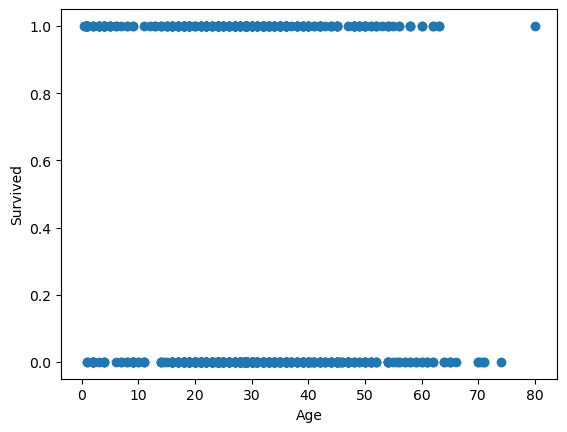

In [13]:
plt.scatter(df['Age'], df['Survived'])
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

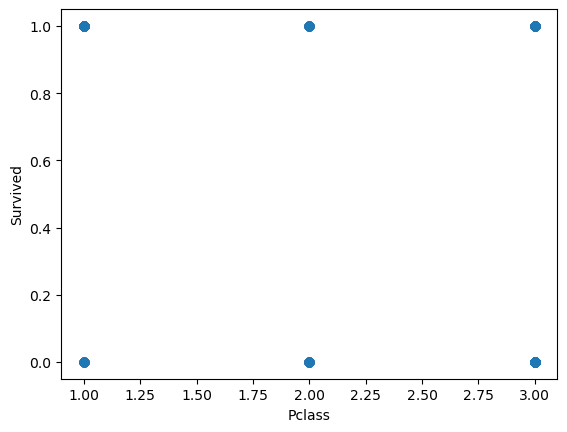

In [14]:
plt.scatter(df['Pclass'], df['Survived'])
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.show()

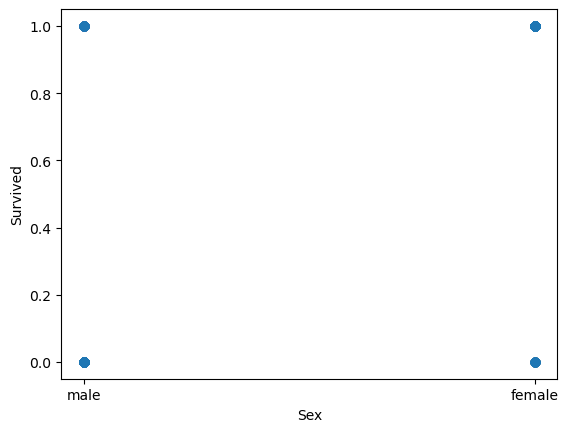

In [15]:
plt.scatter(df['Sex'], df['Survived'])
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.show()

In [16]:
X = df.drop(['Survived'], axis=1)
y = df.Survived

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [18]:
X_train

,Pclass,Sex,Age
681,1,male,27.0
675,3,male,18.0
297,1,female,2.0
373,1,male,22.0
94,3,male,59.0
...,...,...,...
35,1,male,42.0
835,1,female,39.0
338,3,male,45.0
449,1,male,52.0


In [19]:
X_test

,Pclass,Sex,Age
160,3,male,44.0
651,2,female,18.0
438,1,male,64.0
238,2,male,19.0
3,1,female,35.0
...,...,...,...
856,1,female,45.0
270,1,male,29.0
332,1,male,38.0
365,3,male,30.0


In [20]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [22]:
X_test['Sex'] = le.fit_transform(X_test['Sex'])
X_train['Sex'] = le.fit_transform(X_train['Sex'])

In [23]:
X_test.head()

,Pclass,Sex,Age
160,3,1,44.0
651,2,0,18.0
438,1,1,64.0
238,2,1,19.0
3,1,0,35.0


In [24]:
X_train.head()

,Pclass,Sex,Age
681,1,1,27.0
675,3,1,18.0
297,1,0,2.0
373,1,1,22.0
94,3,1,59.0


In [25]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [26]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
predictions = model.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions, y_test)

0.8212290502793296

In [ ]:
model.predict